In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, confusion_matrix
from matplotlib import pyplot as plt
#from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
data['stabf'].unique()

array(['unstable', 'stable'], dtype=object)

In [6]:
data[data['stab'] <=0 ]
# since there are some values less than 0 then there will be the need to drop the 'stab' column

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
10,5.930110,6.730873,6.245138,0.533288,2.327092,-0.702501,-1.116920,-0.507671,0.239816,0.563110,0.164461,0.753701,-0.028411,stable
12,1.616787,2.939228,0.819791,4.191804,3.752282,-1.484885,-1.280581,-0.986816,0.899698,0.866546,0.303921,0.077610,-0.048617,stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,4.141337,1.112868,8.400888,1.869624,3.671563,-0.699052,-1.513896,-1.458615,0.081811,0.094963,0.662959,0.169682,-0.032192,stable
9983,1.482214,3.121273,5.220920,1.609288,4.394557,-1.924542,-0.881996,-1.588019,0.097309,0.096599,0.383334,0.988509,-0.054541,stable
9984,2.501787,3.087194,7.493896,2.177944,3.817471,-0.958986,-1.044281,-1.814205,0.503049,0.107808,0.534358,0.357840,-0.036061,stable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable


In [7]:
X = data.drop(columns = ['stabf', 'stab' ] ) 
y = data['stabf']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 1)


#  Standardization

In [9]:
# train and test feature scaling
st_scaler = StandardScaler()
X_train_data_scaled= st_scaler.fit_transform(X_train) 
scaled_x_train = pd.DataFrame(X_train_data_scaled, columns=X_train.columns) 
train_data_scaled= st_scaler.fit_transform(X_test) 
scaled_x_test = pd.DataFrame(train_data_scaled, columns=X_train.columns) 


# ExtraTreesClassifier Accuracy

In [10]:
et = ExtraTreesClassifier()
model = et.fit(scaled_x_train,y_train)
y_pred = model.predict(scaled_x_test)

accuracy_score(y_test,y_pred)

0.925

# RandomForestClassifier Accuracy

In [11]:
rf = RandomForestClassifier()
model = rf.fit(scaled_x_train,y_train)
y_pred = model.predict(scaled_x_test)

accuracy_score(y_test,y_pred)

0.9185

# LGBMClassifier Accuracy

In [12]:
lgm = LGBMClassifier()
model = lgm.fit(scaled_x_train,y_train)
y_pred = model.predict(scaled_x_test)

accuracy_score(y_test,y_pred)

0.9365

# XGBClassifier Accuracy

In [ ]:
xgm = XGBClassifier()
model = xgm.fit(scaled_x_train,y_train)
y_pred = model.predict(scaled_x_test)

accuracy_score(y_test,y_pred)

# Hyperparameter Optimization and Prediction

In [13]:
param_grid={
        'n_estimators': [100,300, 500, 1000],
        'min_samples_leaf': [4,6,8],
        'min_samples_split': [2,5,7],
        'max_features': ['auto', 'log2']
    }

In [14]:
# Optimizing Hyperparameters

In [15]:
search = RandomizedSearchCV(et, param_grid, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)


In [16]:
search

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=1, scoring='accuracy')

In [17]:
result = search.fit(scaled_x_train,y_train)

In [18]:
# Best hyperparameters
result.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Fitting and predicting with the best hyperpatameters

In [19]:
et_tuned = ExtraTreesClassifier(n_estimators =1000,
        min_samples_leaf = 4,
        min_samples_split= 2,
        max_features = 'log2')
model = et_tuned.fit(scaled_x_train,y_train)
tuned_pred = model.predict(scaled_x_test)

accuracy_score(y_test,tuned_pred)

0.9245

# Feature Importance

In [20]:
f_importance =model.feature_importances_.argsort()

In [21]:
f_importance

array([ 4,  7,  6,  5,  8, 11,  9, 10,  2,  3,  0,  1], dtype=int64)

In [22]:
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [23]:
data.columns[f_importance]

Index(['p1', 'p4', 'p3', 'p2', 'g1', 'g4', 'g2', 'g3', 'tau3', 'tau4', 'tau1',
       'tau2'],
      dtype='object')

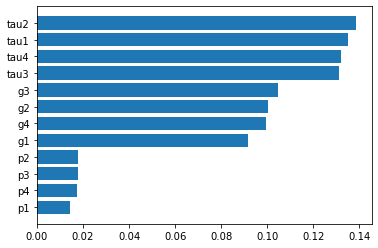

In [24]:
plt.barh(data.columns[f_importance], model.feature_importances_[f_importance])
plt.show()

In [ ]:
# it can be observed from the chart above that the highest feature is tau2 while p1 is the lowest importance